In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)

In [2]:
digit_mnist=keras.datasets.mnist

## Import data to create X_train_full, y_train_full, X_test and y_test variables

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=digit_mnist.load_data()

## Reshape the independent (X) data

In [4]:
X_train_full=X_train_full.reshape((60000,28,28,1))
X_test=X_test.reshape((10000,28,28,1))

## Normalize the data

In [5]:
X_train_n=X_train_full/255.0
X_test_n=X_test/255.0

## Create a validation set of 6000 images

In [6]:
X_valid,X_train=X_train_n[:6000],X_train_n[6000:]
y_valid,y_train=y_train_full[:6000],y_train_full[6000:]
X_test=X_test_n

## Create a CNN model (Model_A) with a Conv layer of filters = 32, kernel_size = (3, 3), strides=1, padding='valid', a Max pooling layer of 2 by 2 window and two dense layers with 200 and 100 neurons

In [7]:
Model_A=keras.models.Sequential()
Model_A.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
Model_A.add(keras.layers.MaxPooling2D((2,2)))

Model_A.add(keras.layers.Flatten()) #using flatten to convert the input 3d array of 28x28x1 pixels into 1d. 
Model_A.add(keras.layers.Dense(200,activation="relu"))  #Dense because its for hidden layer.relu gives 0 for negative input and same input for positive input.
Model_A.add(keras.layers.Dense(100,activation="relu"))   #100 represents no. of neurons.
Model_A.add(keras.layers.Dense(10,activation="softmax"))

## Compile and train the model for 60 epochs

In [8]:
Model_A.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

In [9]:
Model_A_history=Model_A.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/30
844/844 [==============================] - 24s 28ms/step - loss: 0.7587 - accuracy: 0.7873 - val_loss: 0.2808 - val_accuracy: 0.9202
Epoch 2/30
844/844 [==============================] - 23s 27ms/step - loss: 0.2649 - accuracy: 0.9216 - val_loss: 0.2103 - val_accuracy: 0.9415
Epoch 3/30
844/844 [==============================] - 23s 27ms/step - loss: 0.2070 - accuracy: 0.9388 - val_loss: 0.1718 - val_accuracy: 0.9517
Epoch 4/30
844/844 [==============================] - 23s 27ms/step - loss: 0.1704 - accuracy: 0.9493 - val_loss: 0.1505 - val_accuracy: 0.9572
Epoch 5/30
844/844 [==============================] - 23s 27ms/step - loss: 0.1467 - accuracy: 0.9559 - val_loss: 0.1257 - val_accuracy: 0.9622
Epoch 6/30
844/844 [==============================] - 22s 26ms/step - loss: 0.1288 - accuracy: 0.9614 - val_loss: 0.1141 - val_accuracy: 0.9662
Epoch 7/30
844/844 [==============================] - 22s 26ms/step - loss: 0.1149 - accuracy: 0.9653 - val_loss: 0.1072 - val_accuracy:

## Plot the loss and accuracy against epoch

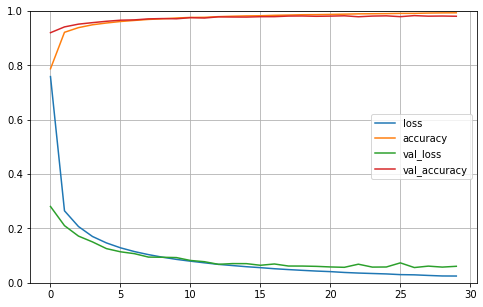

In [10]:
import pandas as pd
pd.DataFrame(Model_A_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## Evaluate the model accuracy on the test dataset

In [11]:
Model_A.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0610 - accuracy: 0.9812


[0.06101522967219353, 0.9811999797821045]

# Create another model (model_B) with number of filter =64

In [7]:
Model_B=keras.models.Sequential()
Model_B.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
Model_B.add(keras.layers.MaxPooling2D((2,2)))

Model_B.add(keras.layers.Flatten()) #using flatten to convert the input 3d array of 28x28x1 pixels into 1d. 
Model_B.add(keras.layers.Dense(200,activation="relu"))  #Dense because its for hidden layer.relu gives 0 for negative input and same input for positive input.
Model_B.add(keras.layers.Dense(100,activation="relu"))   #100 represents no. of neurons.
Model_B.add(keras.layers.Dense(10,activation="softmax"))

In [8]:
Model_B.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics="accuracy")

In [9]:
Model_B_history=Model_B.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_valid,y_valid))

Epoch 1/5
844/844 [==============================] - 38s 45ms/step - loss: 0.7177 - accuracy: 0.8109 - val_loss: 0.2729 - val_accuracy: 0.9245
Epoch 2/5
844/844 [==============================] - 37s 44ms/step - loss: 0.2592 - accuracy: 0.9235 - val_loss: 0.2274 - val_accuracy: 0.9358
Epoch 3/5
844/844 [==============================] - 37s 44ms/step - loss: 0.2048 - accuracy: 0.9394 - val_loss: 0.1752 - val_accuracy: 0.9478
Epoch 4/5
844/844 [==============================] - 37s 43ms/step - loss: 0.1706 - accuracy: 0.9493 - val_loss: 0.1549 - val_accuracy: 0.9520
Epoch 5/5
844/844 [==============================] - 37s 44ms/step - loss: 0.1475 - accuracy: 0.9559 - val_loss: 0.1314 - val_accuracy: 0.9600


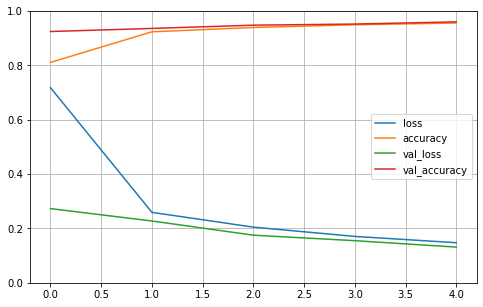

In [10]:
import pandas as pd
pd.DataFrame(Model_B_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
Model_B.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.1308 - accuracy: 0.9597


[0.13076435029506683, 0.9596999883651733]

## Compare the performance and execution time for Model_A and Model_B